#1. Regression model 을 위한 과정
-> 회귀 분석에 사용할 데이터 확인
  
-> LinerRegression 클래스 객체 생성

-> fit 메소드에 학습 데이터 전달 및 학습

-> predict 메소드를 통해 학습된 모델 검증

In [3]:
# 1. 회귀 분석에 사용할 데이터 확인 -> 보스턴 주택 가격 데이터 셋 사용
# 머신러닝용 회귀 분석용 데이터로 총 13개의 feature , 1 개의 label 로 구성된 데이터 셋
# 독립 변수는 5번째 컬럼인 방의 개수
# 종속 변수는 마지막 13번째 컬럼인 주택 가격으로 결정

# 필요한 라이브러리 선언
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression


In [6]:
# 데이터 셋 불러오기
bt = load_boston()
print(bt.data.shape) 

(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [10]:
# 독립변수, 종속변수 데이터 정의 
x_independent = bt.data[:,5]
y_dependent = bt.target
print("독립변수 : ", x_independent[:3])
print("종속변수 : ", y_dependent[:3])


독립변수 :  [6.575 6.421 7.185]
종속변수 :  [24.  21.6 34.7]


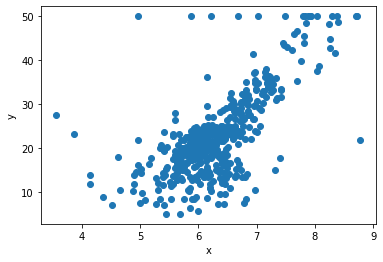

In [13]:
# 데이터의 분포 확인을 위해 산점도로 시각화
plt.figure()
# 산점도 : matplotlib 의 scatter 함수를 사용해 가능
plt.scatter(x_independent, y_dependent)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [15]:
# 2차원 데이터로 shape 변환
x_independent=x_independent.reshape(-1,1)
y_dependent= y_dependent.reshape(-1,1)
print(x_independent.shape, y_dependent.shape)

(506, 1) (506, 1)


In [16]:
# 객체 생성
regression = LinearRegression()

In [17]:
#fit 메소드에 학습 데이터 전달 및 학습
regression.fit(x_independent,y_dependent)

LinearRegression()

In [19]:
#테스팅에 사용할 데이터 생성
testing = np.linspace(min(x_independent),max(x_independent)).reshape(-1,1)
# linpace(start, stop, num=50) -> start 부터 stop 까지 num 개의 수를 균일하게 생성 및 반환하는 함수
# 이때 num 의 default 값은 50
print(testing.shape)

(50, 1)


In [20]:
# 모델 예측 
y_pred = regression.predict(testing)

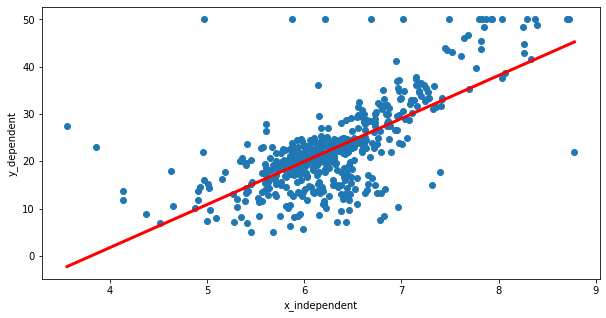

In [23]:
# 최적의 회귀선 시각화
plt.figure(figsize=(10,5))
plt.scatter(x_independent, y_dependent)
# 회귀선 그리기
plt.plot(testing, y_pred, color = 'red', Linewidth = 3)
plt.xlabel('x_independent')
plt.ylabel('y_dependent')
plt.show()
